<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_56/blob/main/Entrega_1Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform, quantile_transform
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import seaborn as sns 
import warnings

%matplotlib inline

In [2]:
url1 = 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
datos = pd.read_csv(url1,encoding = "ISO-8859-1")
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Se comprueba que no hay valores nulos en el dataset

In [3]:
datos.shape

(1068, 57)

In [4]:
#datos.isna().sum()

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [6]:
datos.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [7]:
datos.shape

(1068, 57)

In [8]:
#Obtenemos los nombres de las columnas 

list(datos.columns)

['CLAVE',
 'SITIO',
 'ORGANISMO_DE_CUENCA',
 'ESTADO',
 'MUNICIPIO',
 'ACUIFERO',
 'SUBTIPO',
 'LONGITUD',
 'LATITUD',
 'PERIODO',
 'ALC_mg/L',
 'CALIDAD_ALC',
 'CONDUCT_mS/cm',
 'CALIDAD_CONDUC',
 'SDT_mg/L',
 'SDT_M_mg/L',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'FLUORUROS_mg/L',
 'CALIDAD_FLUO',
 'DUR_mg/L',
 'CALIDAD_DUR',
 'COLI_FEC_NMP/100_mL',
 'CALIDAD_COLI_FEC',
 'N_NO3_mg/L',
 'CALIDAD_N_NO3',
 'AS_TOT_mg/L',
 'CALIDAD_AS',
 'CD_TOT_mg/L',
 'CALIDAD_CD',
 'CR_TOT_mg/L',
 'CALIDAD_CR',
 'HG_TOT_mg/L',
 'CALIDAD_HG',
 'PB_TOT_mg/L',
 'CALIDAD_PB',
 'MN_TOT_mg/L',
 'CALIDAD_MN',
 'FE_TOT_mg/L',
 'CALIDAD_FE',
 'SEMAFORO',
 'CONTAMINANTES',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE']

In [9]:
datos["SITIO"].value_counts()
#datos["SDT_mg/L"].value_counts()


EL FUERTE                           2
POZO VILLA UNION                    2
POZO BERRIOZABAL                    1
RANCHO GIUSEPPE CONSTANZO           1
QUINTA 2 POTRILLOS                  1
                                   ..
POZO SAN FRANCISCO BOJAY COLONIA    1
POZO SANTA ANA AHUEHUEPAN           1
POZO SANTA MARIA DAXTHO             1
POZO PEDRO MARIA ANAYA              1
COMUNIDAD LA REFORMA                1
Name: SITIO, Length: 1066, dtype: int64

In [10]:
#Validar la columna SDT_mg/L
datos["SDT_mg/L"].value_counts()

Series([], Name: SDT_mg/L, dtype: int64)

In [11]:
datos.drop(columns=['SDT_mg/L'], inplace=True)

In [14]:
#datos.isna().sum()
datos.isnull().values.any()

True

In [15]:
# imputacion por moda - Categóricos
datos_cat = ['CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
              'CALIDAD_CD','CALIDAD_CR', 'CALIDAD_HG','CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES'   ]

# imputacion por moda - Continuos
datos_cnt = ['LONGITUD', 'LATITUD' ,'ALC_mg/L', 'SDT_M_mg/L' ,'CONDUCT_mS/cm' ,'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L']

# imputacion por moda - Binarios
datos_bin = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF','CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR',
             'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN' , 'CUMPLE_CON_FE' ]

In [16]:
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cat_pipeline_names = datos_cat

cnt_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cnt_pipeline_names = datos_cnt

bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
bin_pipeline_names = datos_bin


In [17]:
columnTransfomer = ColumnTransformer(transformers = [('catpimp', cat_pipeline, cat_pipeline_names),
                                                       ('cntimp', cnt_pipeline, cnt_pipeline_names),
                                                       ('binimp', bin_pipeline, bin_pipeline_names)
                                                       ],
                                       remainder='passthrough')

In [18]:
ndf = columnTransfomer.fit_transform(datos)
df = pd.DataFrame(ndf, columns=columnTransfomer.get_feature_names_out())
df

,catpimp__CALIDAD_ALC,catpimp__CALIDAD_CONDUC,catpimp__CALIDAD_SDT_ra,catpimp__CALIDAD_SDT_salin,catpimp__CALIDAD_FLUO,catpimp__CALIDAD_DUR,catpimp__CALIDAD_COLI_FEC,catpimp__CALIDAD_N_NO3,catpimp__CALIDAD_AS,catpimp__CALIDAD_CD,...,remainder__MUNICIPIO,remainder__ACUIFERO,remainder__SUBTIPO,remainder__PERIODO,remainder__CD_TOT_mg/L,remainder__CR_TOT_mg/L,remainder__HG_TOT_mg/L,remainder__PB_TOT_mg/L,remainder__MN_TOT_mg/L,remainder__FE_TOT_mg/L
0,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,...,ASIENTOS,VALLE DE CHICALOTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,...,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,...,COSIO,VALLE DE AGUASCALIENTES,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,...,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,2020,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,LA PAZ,TODOS SANTOS,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Alta,Dudosa para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Muy dura e indeseable usos industrial y domestico,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,LINARES,CITRICOLA SUR,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Dura,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,LINARES,CITRICOLA SUR,POZO,2020,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,Alta,Dudosa para riego,Cultivos con manejo especial,Ligeramente salobres,Potable - Optima,Muy dura e indeseable usos industrial y domestico,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,...,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,2020,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [19]:
df.isnull().values.any()

False

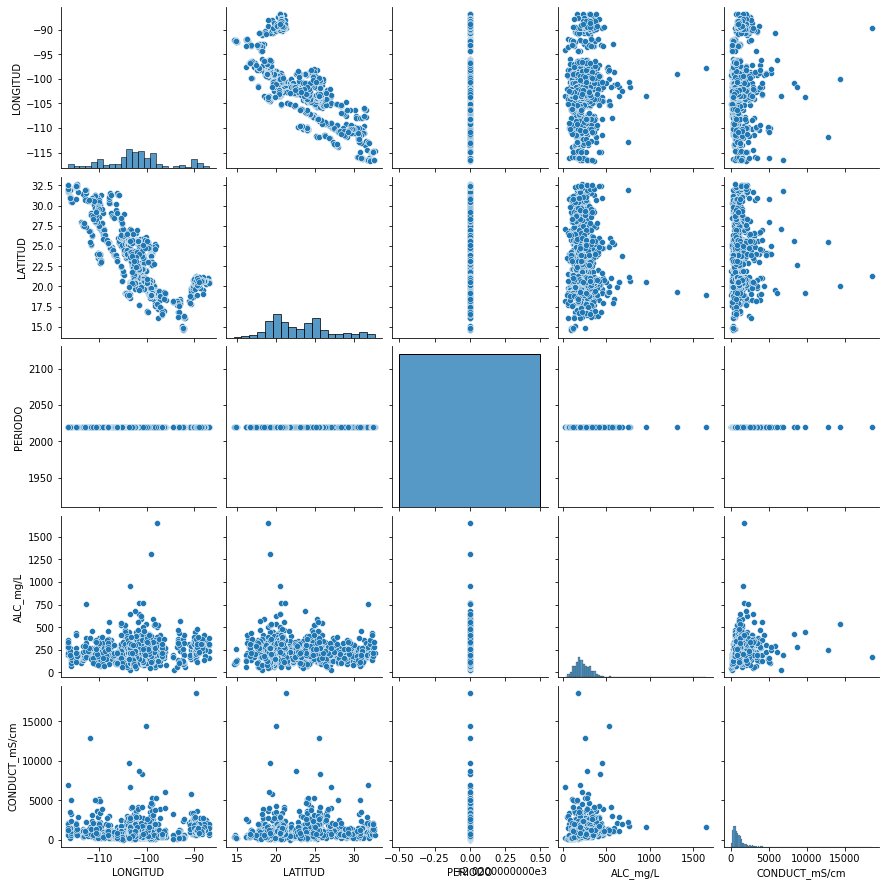

In [20]:
#Visualizamos la dispersión de los datos mediante una gráfica de pairplot
sns.pairplot(datos)

<AxesSubplot:>

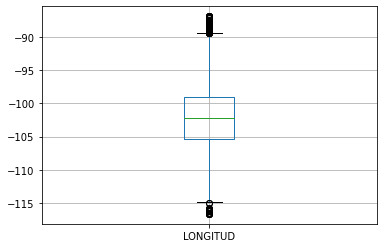

In [21]:
datos.boxplot(column=['LONGITUD'])  

<AxesSubplot:>

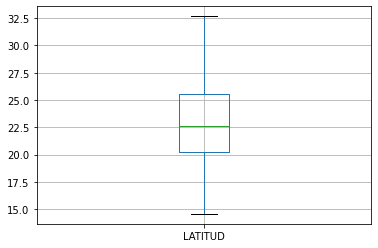

In [22]:
datos.boxplot(column=['LATITUD'])

<AxesSubplot:>

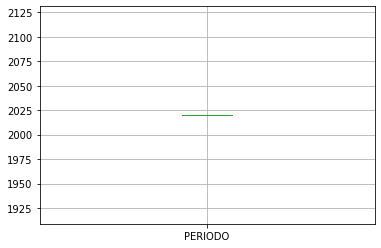

In [23]:
datos.boxplot(column=['PERIODO'])

<AxesSubplot:>

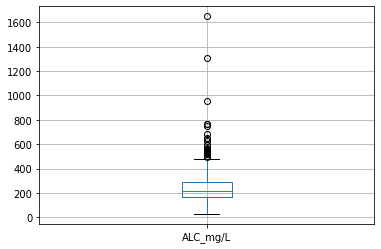

In [24]:
datos.boxplot(column=['ALC_mg/L'])

<AxesSubplot:>

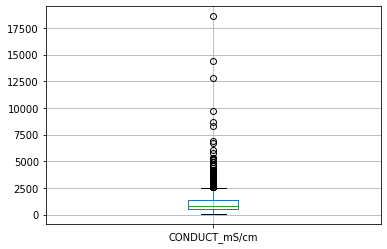

In [25]:
datos.boxplot(column=['CONDUCT_mS/cm'])

In [26]:
datos.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
LONGITUD,1.000000,-0.760204,NaN,0.167234,0.061118
LATITUD,-0.760204,1.000000,NaN,-0.080026,0.053786
PERIODO,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.167234,-0.080026,NaN,1.000000,0.232003
CONDUCT_mS/cm,0.061118,0.053786,NaN,0.232003,1.000000
